In [119]:
#mengimport pandas untuk memproses data
import pandas as pd

proses pengimputan data

In [120]:
df = pd.read_csv('/content/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [121]:
#melihat seberapa banyak data
df.shape

(2225, 2)

melakukan preprocessing pada data

In [122]:
# import dan download package
import nltk, os, re, string

from keras.layers import Input, LSTM, Dropout, Flatten, Dense, Embedding
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords') 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
#mengubah huruf kapital menjadi huruf kecil
df['text'] = df['text'].str.lower()
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [124]:
#hapus angka
def hapus_angka(tweet):
    tweet = re.sub(r"\d+", "", tweet)
    return tweet

In [125]:
df['text'] = df['text'].apply(lambda x: hapus_angka(x))
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [126]:
#menghapus tanda baca
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))

In [127]:
df['text'] = df['text'].apply(lambda x: cleaner(x))
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [128]:
#mengubah kata menjadi kata dasar
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df.text = df.text.apply(lambda x: lem(x))

In [129]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [130]:
#menghapus beberapa kata yang tidak penting
from nltk.corpus import stopwords
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))

df['text'] = df['text'].apply(lambda x: stopword(x))
df.head(10)

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books former worldcom boss ...
2,sport,tigers wary farrell gamble leicester rushed ma...
3,sport,yeading newcastle cup premiership side newcast...
4,entertainment,ocean twelve raids box office ocean twelve cri...
5,politics,howard hits back mongrel jibe michael howard c...
6,politics,blair prepares poll date tony blair election d...
7,sport,henman hopes ended dubai seed tim henman slump...
8,sport,wilkinson fit edinburgh england captain jonny ...
9,entertainment,star wars children sixth final star wars movie...


In [131]:
#merubah label string menjadi angka
category = pd.get_dummies(df.category)
df_new_cat = pd.concat([df, category], axis=1)
df_new_cat = df_new_cat.drop(columns='category')
df_new_cat.head(10)

,text,business,entertainment,politics,sport,tech
0,tv future hands viewers home theatre systems p...,0,0,0,0,1
1,worldcom boss left books former worldcom boss ...,1,0,0,0,0
2,tigers wary farrell gamble leicester rushed ma...,0,0,0,1,0
3,yeading newcastle cup premiership side newcast...,0,0,0,1,0
4,ocean twelve raids box office ocean twelve cri...,0,1,0,0,0
5,howard hits back mongrel jibe michael howard c...,0,0,1,0,0
6,blair prepares poll date tony blair election d...,0,0,1,0,0
7,henman hopes ended dubai seed tim henman slump...,0,0,0,1,0
8,wilkinson fit edinburgh england captain jonny ...,0,0,0,1,0
9,star wars children sixth final star wars movie...,0,1,0,0,0


spliting data

In [132]:
text = df_new_cat['text'].values
label = df_new_cat[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [133]:
from sklearn.model_selection import train_test_split
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [134]:
#melakukan proses tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [135]:
#membuat model 
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          320000    
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 361,989
Trainable params: 361,989
Non-trainable params: 0
_________________________________________________________________


In [136]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.94 and logs.get('val_accuracy')>0.94):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [137]:
#melakukan pelatihan pada model
history = model.fit(padded_latih, label_latih, epochs=30, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
56/56 - 5s - loss: 1.5590 - accuracy: 0.2961 - val_loss: 1.4420 - val_accuracy: 0.4449 - 5s/epoch - 87ms/step
Epoch 2/30
56/56 - 3s - loss: 1.0825 - accuracy: 0.4815 - val_loss: 0.8283 - val_accuracy: 0.6494 - 3s/epoch - 51ms/step
Epoch 3/30
56/56 - 3s - loss: 0.6550 - accuracy: 0.7348 - val_loss: 0.6660 - val_accuracy: 0.7753 - 3s/epoch - 51ms/step
Epoch 4/30
56/56 - 3s - loss: 0.2662 - accuracy: 0.9247 - val_loss: 0.3799 - val_accuracy: 0.8966 - 3s/epoch - 50ms/step
Epoch 5/30
56/56 - 3s - loss: 0.0688 - accuracy: 0.9848 - val_loss: 0.3625 - val_accuracy: 0.8989 - 3s/epoch - 51ms/step
Epoch 6/30
56/56 - 3s - loss: 0.0375 - accuracy: 0.9910 - val_loss: 0.4236 - val_accuracy: 0.8876 - 3s/epoch - 50ms/step
Epoch 7/30
56/56 - 3s - loss: 0.0350 - accuracy: 0.9933 - val_loss: 0.3879 - val_accuracy: 0.9101 - 3s/epoch - 50ms/step
Epoch 8/30
56/56 - 3s - loss: 0.0051 - accuracy: 0.9994 - val_loss: 0.4367 - val_accuracy: 0.9124 - 3s/epoch - 50ms/step
Epoch 9/30
56/56 - 3s - loss: 0.

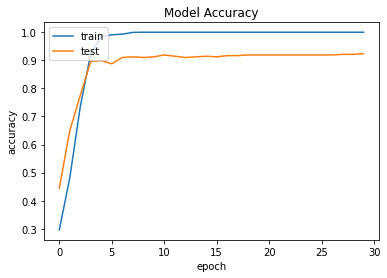

In [138]:
# plot of accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


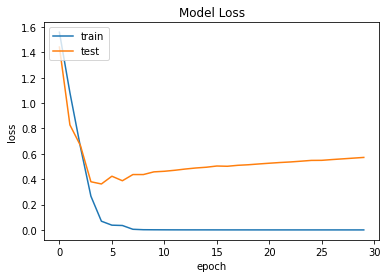

In [139]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Muhammad Zaim Mustaqim
miazmustaqim@gmail.com